##### <font color=#A0A0A0>
##### ══════════════════════════════════════════════════════════════
#####     🦾🤖 **CREATING A CONVOLUTIONAL NEURAL NETWORK FROM SCRATCH**
##### ══════════════════════════════════════════════════════════════ </font>

#### 🎯 Project Objetive
Make a general convolutional neural network from scratch with some of the most important configurations. Implementing the convolutional layer, pooling layer, flatten layer and the dense layer to undertand the altgorithm. Then test it with different data sets and track it's performance with differents hyperparameters.

In [15]:
#import used pakages
import sys
import os
import random

if 'convolutional_net' in sys.modules:
    del sys.modules['convolutional_net']
    
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))
from keras.datasets import mnist
from keras.datasets import fashion_mnist
import numpy as np 
from sklearn.model_selection import train_test_split
from convolutional_net import Network,ConvLayer ,PoolingLayer, FlattenLayer, DenseLayer
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [16]:
# ------------- training the mnist dataset -------------------
# Preparing the train, validation and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=42)

In [17]:
valid_data = (x_val, y_val)

In [18]:
#Training the whole data in the network takes so much time to train (hours)
# layers = [
#     ConvLayer(kernel_size=2, filters=4, padding=0),
#     PoolingLayer(2),
#     FlattenLayer(),
#     DenseLayer(10, activation='softmax')
# ]

# model = Network(layers)
# cost, accu = model.train(x_train, y_train, 10, 32, 0.1, validation_data=valid_data)

In [19]:
# layers = [
#     ConvLayer(kernel_size=2, filters=4, padding=0),
#     PoolingLayer(2),
#     FlattenLayer(),
#     DenseLayer(10, activation='softmax')
# ]

# x_train = x_train[:10]
# y_train = y_train[:10]
# valid_data = valid_data[:50]

# model = Network(layers)
# cost, accu = model.train(x_train, y_train, 5, 28, 0.1, validation_data=valid_data)

In [20]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

# ax1.plot(cost, marker='o', linestyle='-', color='r', label='η = 1')
# ax1.set_title('Convolutional Network Cost of mnist dataset')
# ax1.set_xlabel('Cost')
# ax1.set_ylabel('Cost')
# ax1.legend()
# ax1.grid(True)

# ax2.plot(accu, marker='o', linestyle='-', color='r', label='η = 1')
# ax2.set_title('Convolutional Network Accuracy of mnist dataset')
# ax2.set_xlabel('Accuracy')
# ax2.set_ylabel('Cost')
# ax2.legend()
# ax2.grid(True)
# plt.savefig('../assets/TestingLearningRateSchedule.png')
# plt.tight_layout()
# plt.show()

In [21]:
# plt.figure(figsize=(8,5))
# plt.plot(cost, marker='o', linestyle='-', color='r')
# plt.title('Cost of the convolution neural network')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid(True)
# plt.show()

The main goal was to implement the algorithm in Python using NumPym but unfortunately, training the model takes too much time due to the inefficiency of the tools used in the programming process. Therefore, from now on, the TensorFlow library will be used instead to accelerate the testing process and experiment with different hyperparameters.

Let's compare the behavior of a RNN and CNN during the training process on the MNIST dataset.
The first step is to normalize the data, which is important to ensure that the agnitude of the features does not affect the training process or introduce bias.

In [22]:
from tensorflow import keras
from keras import layers
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images_rnn = train_images.reshape((60000, 28*28))
train_images_rnn = train_images_rnn.astype('float32')/255
test_images_rnn = test_images.reshape((10000, 28*28))
test_images_rnn = test_images_rnn.astype('float32')/255

In [23]:
model_1 = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
model_1.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model_metrics1 = model_1.fit(train_images_rnn, train_labels, epochs=12, batch_size=128)

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9237 - loss: 0.2657
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 0.1078
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0703
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9846 - loss: 0.0510
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9887 - loss: 0.0385
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9919 - loss: 0.0285
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9937 - loss: 0.0220
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9959 - loss: 0.0162
Epoch 9/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9970 - loss: 0.0127
Epoch 10/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9975 - loss: 0.0097
Epoch 11/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9985 - loss: 0.0072
Epoch 12/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [26]:
test_loss_1, test_accuracy_1 = model_1.evaluate(test_images_rnn, test_labels)

# Imprimir los resultados
print(f"Loss with the test data: {test_loss_1:.4f}")
print(f"Accuracy with the test data: {test_accuracy_1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9819 - loss: 0.0693
Loss with the test data: 0.0693
Accuracy with the test data: 0.9819


In [27]:
accu_model1 = model_metrics1.history['accuracy']
loss_model1 = model_metrics1.history['loss']
idx_max_acc = np.argmax(accu_model1)
idx_min_loss = np.argmin(loss_model1)
max_acc = round(accu_model1[idx_max_acc],4)
min_loss = round(loss_model1[idx_min_loss],4)

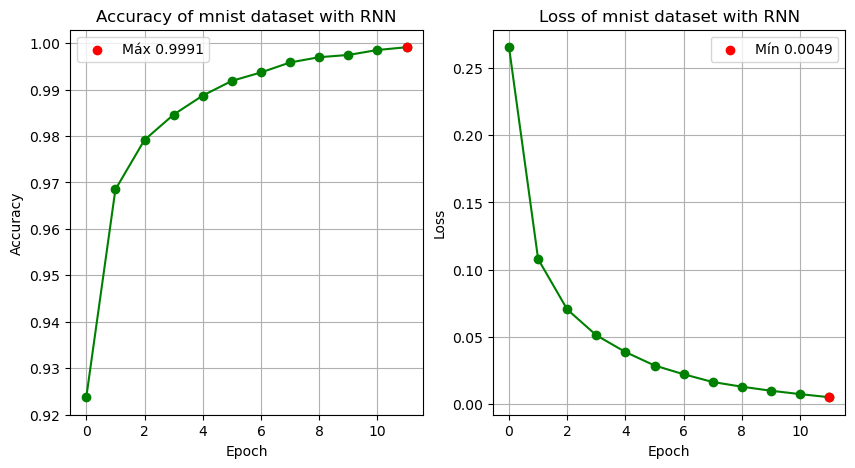

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(accu_model1, marker='o', linestyle='-', color='g')
ax1.scatter(idx_max_acc, max_acc, color="red", zorder=5, label=f"Máx {max_acc}")
ax1.set_title('Accuracy of mnist dataset with RNN')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(loss_model1, marker='o', linestyle='-', color='g')
ax2.scatter(idx_min_loss, min_loss, color="red", zorder=5, label=f"Mín {min_loss}")
ax2.set_title('Loss of mnist dataset with RNN')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

Now let's train the convolutional neural network with a basic configuration, similar to the RNN, to compare how much epochs does it takes to achieve equal or better performance.

In [35]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_2 = keras.Model(inputs=inputs, outputs=outputs)

In [36]:
model_2.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model_metrics_conv = model_2.fit(train_images, train_labels, epochs=12 ,batch_size=64)

Epoch 1/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9352 - loss: 0.7187
Epoch 2/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9810 - loss: 0.0685
Epoch 3/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9863 - loss: 0.0481
Epoch 4/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0351
Epoch 5/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9922 - loss: 0.0283
Epoch 6/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9944 - loss: 0.0207
Epoch 7/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9946 - loss: 0.0202
Epoch 8/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9955 - loss: 0.0168
Epoch 9/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9960 - loss: 0.0143
Epoch 10/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9965 - loss: 0.0134
Epoch 11/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9969 - loss: 0.0117
Epoch 12/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step

In [37]:
accu_model_conv = model_metrics_conv.history['accuracy']
loss_model_conv = model_metrics_conv.history['loss']
idx_max_acc = np.argmax(accu_model_conv)
idx_min_loss = np.argmin(loss_model_conv)
max_acc = round(accu_model_conv[idx_max_acc],4)
min_loss = round(loss_model_conv[idx_min_loss],4)

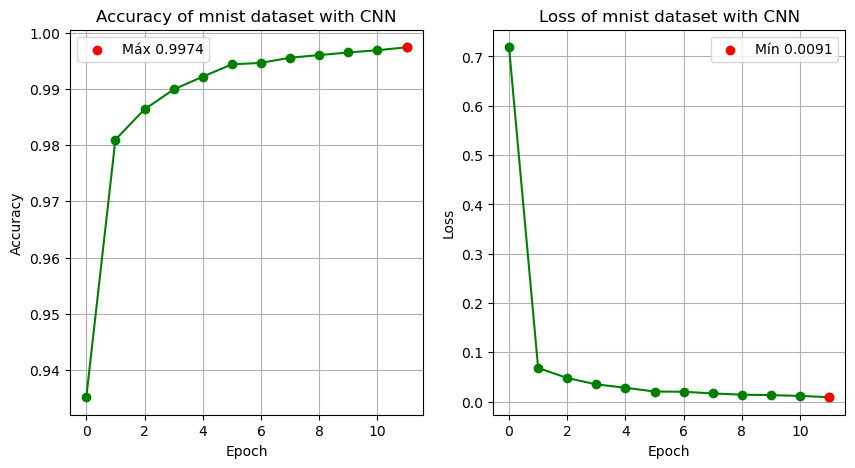

In [38]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(accu_model_conv, marker='o', linestyle='-', color='g')
ax1.scatter(idx_max_acc, max_acc, color="red", zorder=5, label=f"Máx {max_acc}")
ax1.set_title('Accuracy of mnist dataset with CNN')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(loss_model_conv, marker='o', linestyle='-', color='g')
ax2.scatter(idx_min_loss, min_loss, color="red", zorder=5, label=f"Mín {min_loss}")
ax2.set_title('Loss of mnist dataset with CNN')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

In [51]:
test_loss,  test_accu = model_2.evaluate(test_images, test_labels)
print('Loss of the model with the test data: ', test_loss)
print('Accuracy of the model with the test data: ', test_accu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9844 - loss: 0.1151
Loss of the model with the test data:  0.11511910706758499
Accuracy of the model with the test data:  0.9843999743461609


Both models show similar performance, with the RNN achievin a sligthly better result, although the difference is not significant. Now, let's apply additional techniques to the CNN to achieve higher accuracy in epochs.

In [67]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=4, kernel_size=3, activation='relu')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.25)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.25)(x)
outputs = layers.Dense(10, activation='softmax')(x)
model_3 = keras.Model(inputs=inputs, outputs=outputs)

In [68]:
model_3.compile(optimizer='Adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
model_3_metrics = model_3.fit(train_images, train_labels, epochs=10 ,batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9360 - loss: 0.2134
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9748 - loss: 0.0802
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9808 - loss: 0.0620
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9843 - loss: 0.0501
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9858 - loss: 0.0461
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9873 - loss: 0.0400
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9880 - loss: 0.0381
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9904 - loss: 0.0299
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9901 - loss: 0.0330
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9912 - loss: 0.0286


In [69]:
test_loss_3,  test_accu_3 = model_3.evaluate(test_images, test_labels)
print('Loss of the model with the test data: ', test_loss_3)
print('Accuracy of the model with the test data: ', test_accu_3)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9904 - loss: 0.0368
Loss of the model with the test data:  0.036821700632572174
Accuracy of the model with the test data:  0.9904000163078308


In [70]:
accu_model_3 = model_3_metrics.history['accuracy']
loss_model_3 = model_3_metrics.history['loss']
idx_max_acc = np.argmax(accu_model_3)
idx_min_loss = np.argmin(loss_model_3)
max_acc3 = round(accu_model_3[idx_max_acc],4)
min_loss3 = round(loss_model_3[idx_min_loss],4)

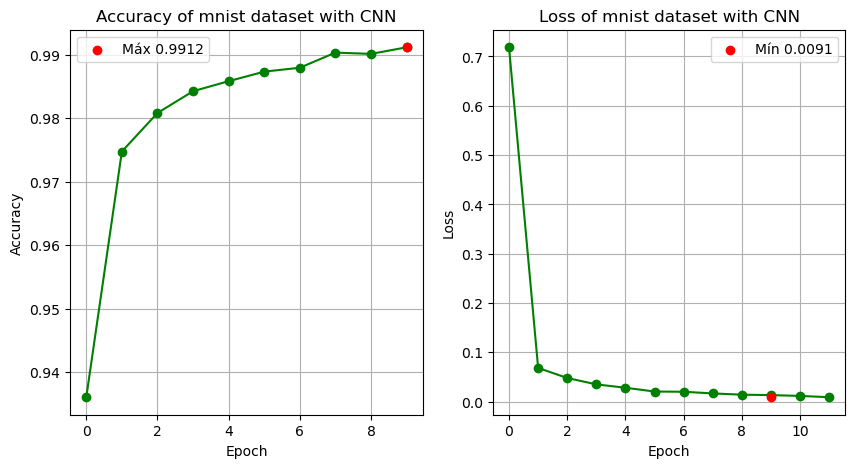

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(accu_model_3, marker='o', linestyle='-', color='g')
ax1.scatter(idx_max_acc, max_acc3, color="red", zorder=5, label=f"Máx {max_acc3}")
ax1.set_title('Accuracy of mnist dataset with CNN')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

ax2.plot(loss_model_conv, marker='o', linestyle='-', color='g')
ax2.scatter(idx_min_loss, min_loss, color="red", zorder=5, label=f"Mín {min_loss}")
ax2.set_title('Loss of mnist dataset with CNN')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)
plt.show()

In this new configuration, the optimazer were changed to *Adam*, which provides faster and more stable convergence.  A *BatchNormalization* layer was added after each Conv2D layer to normalize the activations and to prevent overfitting, the Dropout technique was applied after the last pooling layer and before the dense layers.  
This model show a performance similar to the previous one, however, it achieves better results on the test data, with lower loss and higher accuracy, effectively reducing overfitting.